# Crash Data System - Data Quality Exploration

**Author: Eric Englin**

**Date: 7/23/21**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/CDS All Crashes Table for FLH 6-28-21.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(83926, 58)

In [4]:
df.head()

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,LATITUDE,LONGITUDE,MILEPOST,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC
0,6,ABLI140610163500,14054379,ABLI,SER,1,KY,"Tuesday, June 10, 2014",1635.0,NaN,...,38.91205,-76.93412,0.0,NaN,NaN,00:00.0,NaN,NaN,NaN,0
1,5,ABLI121009110000,12474,ABLI,SER,1,KY,"Tuesday, October 9, 2012",1100.0,101,...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0
2,4,ABLI091117170900,N08113,ABLI,SER,1,NY,"Tuesday, November 17, 2009",1709.0,NaN,...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0
3,3,ABLI070804175500,5540070013,ABLI,SER,1,KY,"Saturday, August 4, 2007",1755.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2,ABLI070425075000,5540070001,ABLI,SER,1,KY,"Wednesday, April 25, 2007",750.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df_imr = df.loc[df['Region']=='IMR']
df_imr.shape

(9654, 58)

In [6]:
df_imr['PARK_ALPHA'].value_counts()

YELL    2371
ROMO    1921
GRTE    1089
GRCA     972
MEVE     633
ZION     588
SAGU     575
GLAC     541
BIBE     394
GLCA     157
PAIS     155
COLM      73
CHIC      56
AMIS      38
PETR      26
BRCA      15
ARCH      12
FLFO      10
PEFO       9
BITH       4
PECO       3
FOBU       2
LAMR       2
HUTR       1
DETO       1
SAPU       1
CORO       1
CARE       1
JODR       1
CANY       1
BAND       1
Name: PARK_ALPHA, dtype: int64

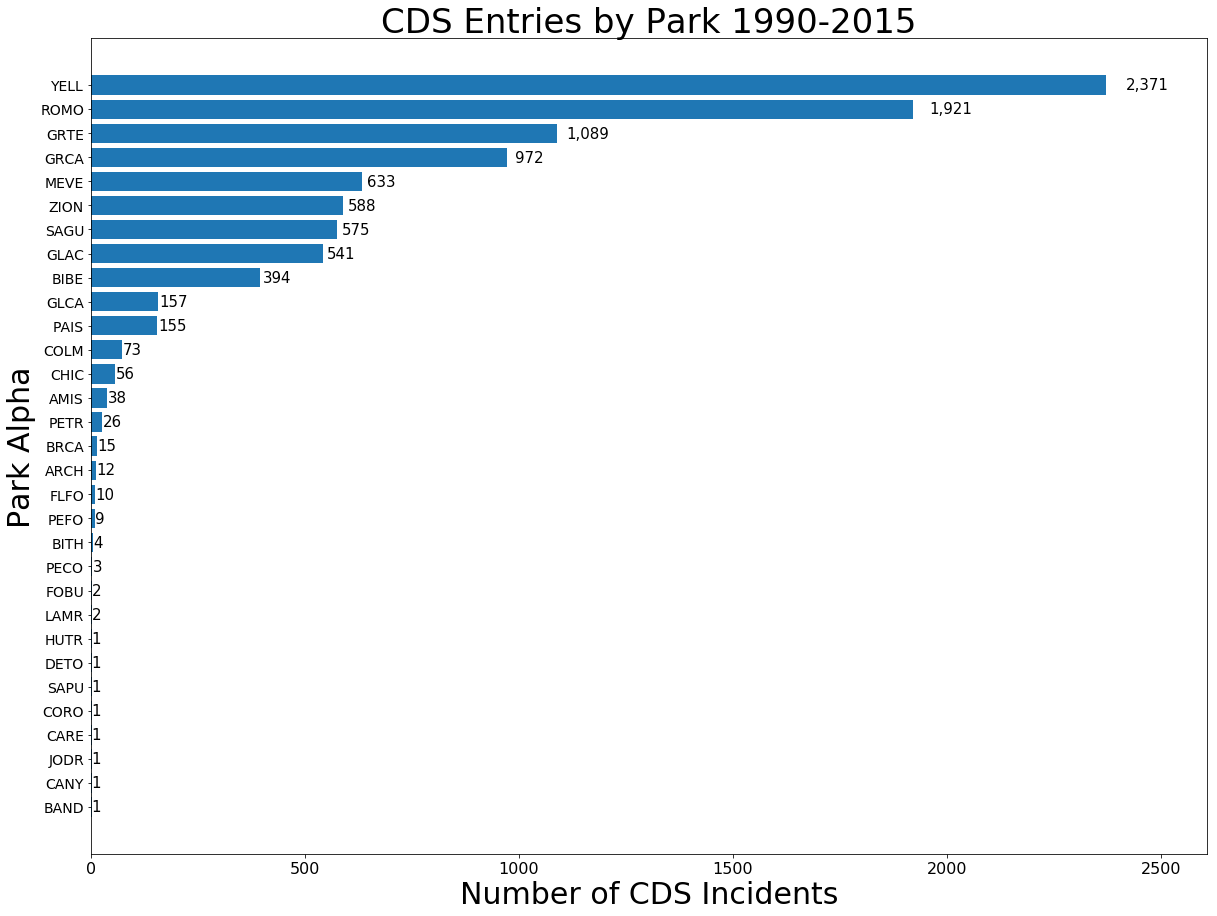

In [7]:
bar_labels = []
for x in df_imr.PARK_ALPHA.value_counts().index:
    
    bar_labels.append(x)

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
ax.set_title('CDS Entries by Park 1990-2015',fontsize= 34) # title of plot
bars = ax.barh(width = df_imr.PARK_ALPHA.value_counts(), y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of CDS Incidents',fontsize = 30) #xlabel
ax.set_ylabel('Park Alpha', fontsize = 30)#ylabel
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=26)
for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=15)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

plt.xlim([0, df_imr.PARK_ALPHA.value_counts()[0]*1.1])
plt.show()

In [8]:
df_imr.columns

Index(['OBJECTID', 'INCID_NO', 'CASE_NUM', 'PARK_ALPHA', 'Region', '# Crash',
       'STATE_CODE', 'CRASH_DATE', 'CRASH_TIME', 'RTE_NO', 'RTE_NAME',
       'NODE_DIST_FT', 'NODE_DIST_MI', 'NODE_DIR', 'NODE_NUM', 'LIGHT',
       'WEATHER', 'CRASH_LOCATION', 'SURF_COND', 'CRASH_CLASS', 'VEH_COLL',
       'OBJ_STRUCK', 'ROAD_CHAR', 'CON_FACT1', 'CON_FACT2', 'CON_FACT3',
       'CON_FACT4', 'CON_FACT5', 'CON_FACT6', 'HIT_RUN', 'CATEGORY', 'FATALS',
       'INJURED', 'PED_FAT', 'PED_INJ', 'BIKE_FAT', 'BIKE_INJ', 'PED',
       'CRASH_YEAR', 'COMMENTS', 'ZIPFILE', 'LOCATION', 'PHOTOS_TAKEN',
       'USPP_NPS_VEH_INV', 'PARK_PTY_DEST', 'LOCKED_UPDATE', 'LOCKED_BY_USER',
       'DATA_SRC', 'LATITUDE', 'LONGITUDE', 'MILEPOST', 'IMPORT_DATE',
       'FILE_NAME', 'SAVE_DATE', 'ROUTE_IDENT', 'RIP_CYCLE', 'MP_NODE',
       'SPTL_LOC'],
      dtype='object')

In [9]:
df_imr['pub_utc_timestamp_date'] = pd.to_datetime(df_imr['CRASH_DATE'])
df_imr["date"] = df_imr["pub_utc_timestamp_date"].dt.strftime("%m/%d/%y")
df_imr['month_year']=df_imr["pub_utc_timestamp_date"].dt.strftime("%Y-%m")
df_imr['year']=df_imr["pub_utc_timestamp_date"].dt.strftime("%Y")
df_imr['month']=df_imr["pub_utc_timestamp_date"].dt.strftime("%B")
df_imr['hour']=df_imr["pub_utc_timestamp_date"].dt.strftime("%I%p")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [10]:
df_year_grouped = df_imr.groupby(['year']).count()
df_year_grouped= df_year_grouped.reset_index()
df_year_grouped = df_year_grouped[['year','PARK_ALPHA']].sort_values(by='year')
df_year_grouped 

,year,PARK_ALPHA
0,1940,1
1,1965,1
2,1967,1
3,1994,109
4,1995,168
5,1996,198
6,1997,419
7,1998,258
8,1999,337
9,2000,293


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


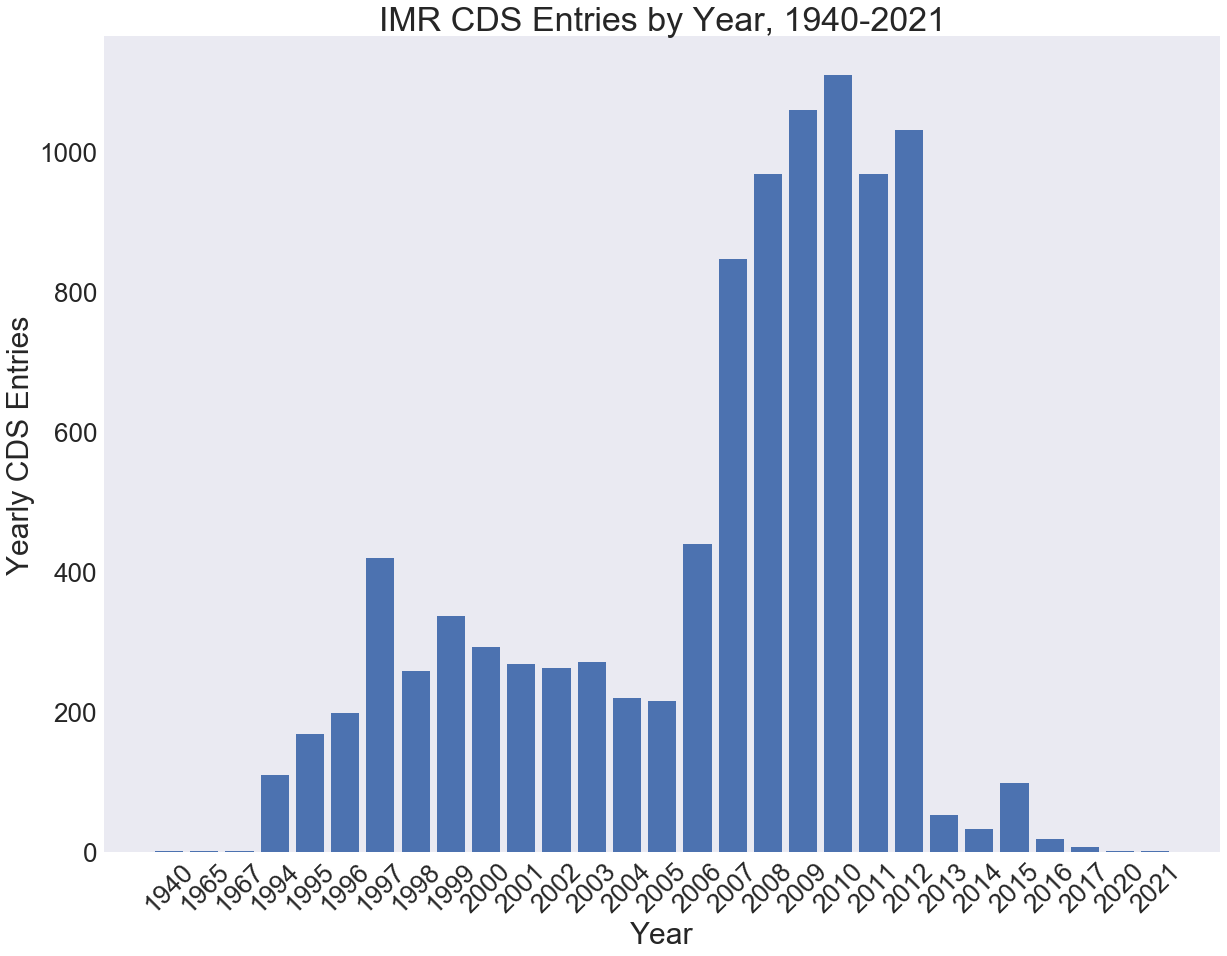

In [11]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')

tick_spacing = 1
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.bar(df_year_grouped.year, df_year_grouped.PARK_ALPHA, linewidth=4)
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
ax.set_title('IMR CDS Entries by Year, 1940-2021',fontsize= 34) # title of plot

ax.set_xlabel('Year',fontsize = 30) #xlabel
ax.set_ylabel('Yearly CDS Entries', fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=26, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=26)
ax.tick_params(axis='both', which='minor', labelsize=26)
ax.grid('off')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


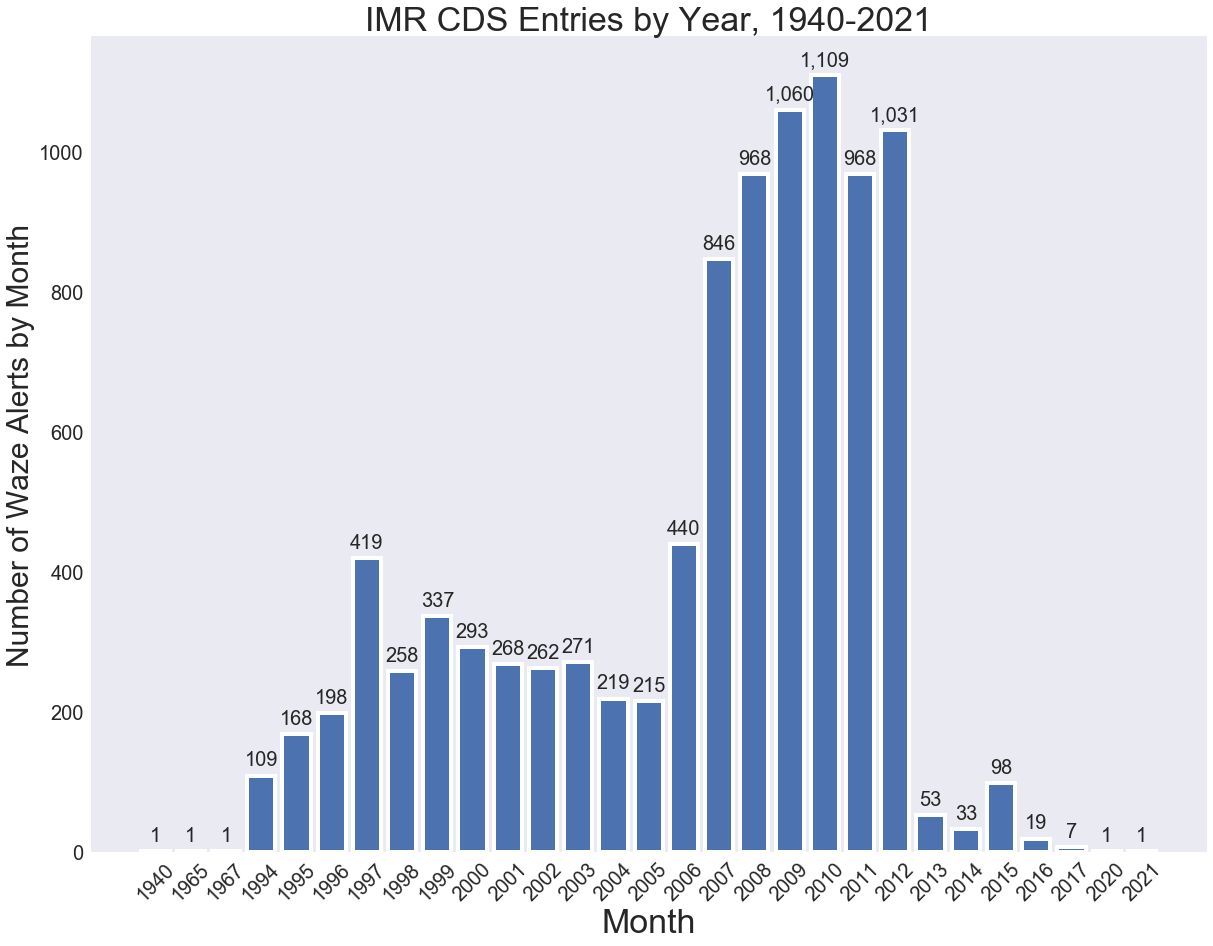

In [97]:
import matplotlib.ticker as ticker

tick_spacing = 1
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.bar(df_year_grouped.year, df_year_grouped.PARK_ALPHA, linewidth=4)
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
ax.set_title('IMR CDS Entries by Year, 1940-2021',fontsize= 34) # title of plot

ax.set_xlabel('Month',fontsize = 34) #xlabel
ax.set_ylabel('Number of Waze Alerts by Month', fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=20, rotation = 45)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=18)

for x,y in zip(df_year_grouped.year, df_year_grouped.PARK_ALPHA):

    label = '{:,}'.format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 20) # horizontal alignment can be left, right or center
ax.grid('off')
plt.show()

In [13]:
df_imr_goodyears = df_imr.loc[df_imr['year'].isin(['2007','2008','2009','2010','2011','2012'])]
df_imr_goodyears.shape

(5982, 64)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


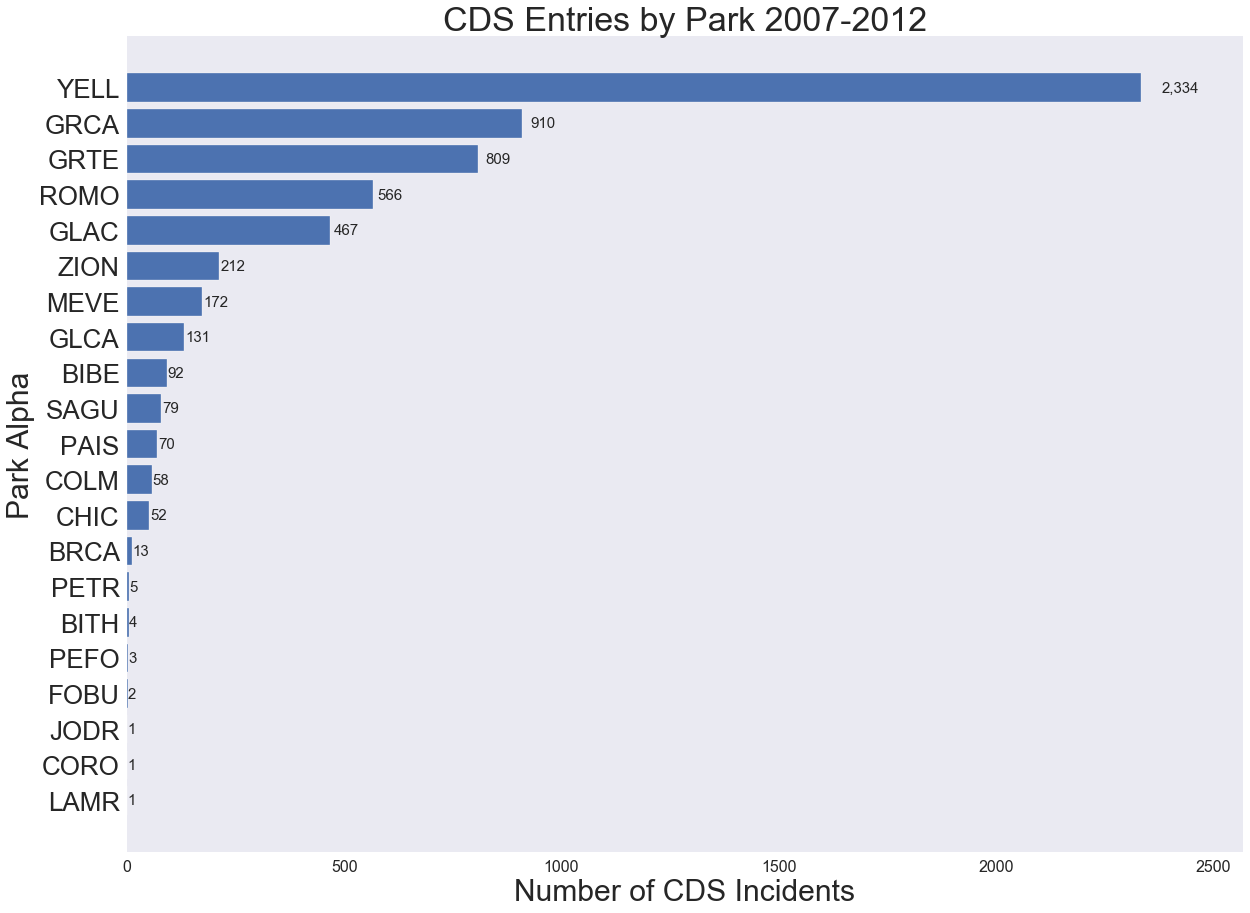

In [96]:
bar_labels = []
for x in df_imr_goodyears.PARK_ALPHA.value_counts().index:
    
    bar_labels.append(x)

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
ax.set_title('CDS Entries by Park 2007-2012',fontsize= 34) # title of plot
bars = ax.barh(width = df_imr_goodyears.PARK_ALPHA.value_counts(), y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of CDS Incidents',fontsize = 30) #xlabel
ax.set_ylabel('Park Alpha', fontsize = 30)#ylabel
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=26)
for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=15)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

plt.xlim([0, df_imr_goodyears.PARK_ALPHA.value_counts()[0]*1.1])
ax.grid('off')
plt.show()

In [15]:
df_imr_goodyears_v2 = df_imr.loc[df_imr['year'].isin(['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'])]
df_imr_goodyears_v2.shape

(6723, 64)

In [16]:
for x in df_imr_goodyears.PARK_ALPHA.unique():
    print(x)

BIBE
BITH
BRCA
CHIC
COLM
CORO
FOBU
GLAC
GLCA
GRCA
GRTE
JODR
LAMR
MEVE
PAIS
PEFO
PETR
ROMO
SAGU
YELL
ZION


In [17]:
for x in df_imr_goodyears.PARK_ALPHA.value_counts():
    print(x)

2334
910
809
566
467
212
172
131
92
79
70
58
52
13
5
4
3
2
1
1
1


In [29]:
year_df_alerts

,year,YELL,GRCA,GRTE,ROMO,GLAC,ZION,MEVE,GLCA,BIBE,SAGU
0,2005,3,1.0,1.0,79,70.0,36.0,39.0,15.0,20.0,27.0
1,2006,2,7.0,114.0,94,80.0,39.0,34.0,37.0,24.0,36.0
2,2007,337,219.0,127.0,105,66.0,46.0,46.0,15.0,29.0,32.0
3,2008,326,195.0,133.0,71,78.0,56.0,26.0,38.0,16.0,10.0
4,2009,400,164.0,113.0,81,90.0,56.0,24.0,26.0,19.0,15.0
5,2010,421,163.0,141.0,130,81.0,43.0,36.0,3.0,23.0,9.0
6,2011,389,162.0,112.0,102,72.0,11.0,21.0,NaN,4.0,13.0
7,2012,461,15.0,183.0,77,1.0,5.0,19.0,NaN,1.0,NaN
8,2013,1,15.0,1.0,28,NaN,NaN,NaN,NaN,NaN,NaN
9,2014,1,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
temp_df_years = temp_df.groupby(['year']).count()
temp_df_years

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC,pub_utc_timestamp_date,date,month_year,month,hour
year,,,,,,,,,,,,,,,,,,,,,
2011,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1


In [45]:
temp_df_years= temp_df_years.reset_index()
temp_df_years = temp_df_years[['year','PARK_ALPHA']]
temp_df_years

,year,PARK_ALPHA
0,2011,1


In [46]:
temp_df_years.year = temp_df_years.year.astype("category")
temp_df_years

,year,PARK_ALPHA
0,2011,1


In [47]:
year_df_alerts.merge(temp_df_years, how = "left")

,year,index,PARK_ALPHA
0,2005,0,3
1,2006,1,2
2,2007,2,337
3,2008,3,326
4,2009,4,400
5,2010,5,421
6,2011,6,389
7,2012,7,461
8,2013,8,1
9,2014,9,1


In [48]:
year_df_alerts[x] =temp_df_years[['PARK_ALPHA']] 
year_df_alerts

,year,index,PARK_ALPHA,LAMR
0,2005,0,3,1.0
1,2006,1,2,NaN
2,2007,2,337,NaN
3,2008,3,326,NaN
4,2009,4,400,NaN
5,2010,5,421,NaN
6,2011,6,389,NaN
7,2012,7,461,NaN
8,2013,8,1,NaN
9,2014,9,1,NaN


In [51]:
year_df_alerts.PARK_ALPHA

0      3
1      2
2    337
3    326
4    400
5    421
6    389
7    461
8      1
9      1
Name: PARK_ALPHA, dtype: int64

In [50]:
temp_df_years

,year,PARK_ALPHA
0,2011,1


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


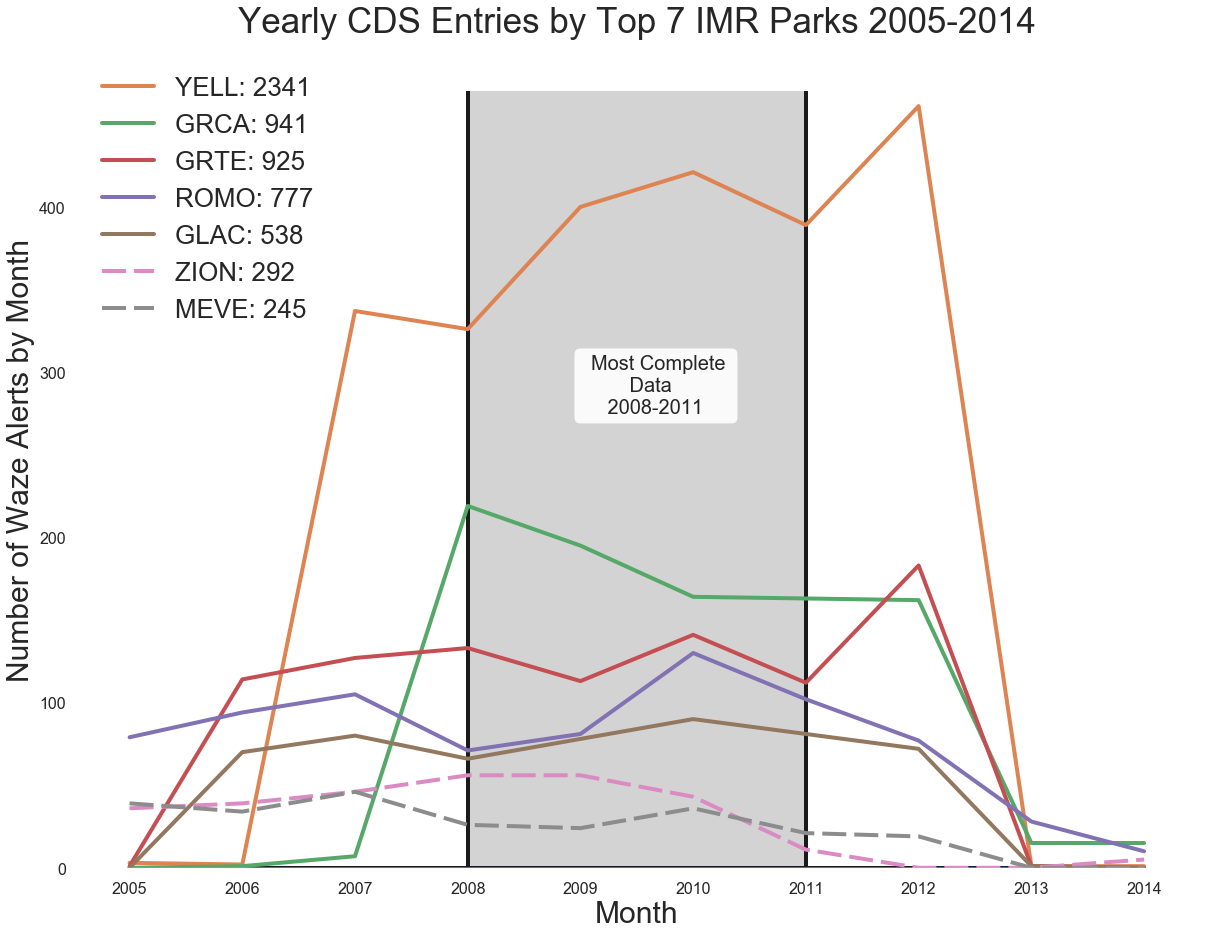

In [127]:
plt.style.use('seaborn')
import seaborn as sns
sns.set_palette("rocket", 5)
years = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
year_df_alerts = pd.DataFrame({'year':years})
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})

fig, ax = plt.subplots(1,1,figsize=(20,15))
count = 0

ax.plot(years,[0]*10)
plt.bar('2009', [0,470], width = 2, color = 'lightgray', alpha = 1)
plt.bar('2010', [0,470], width = 2, color = 'lightgray', alpha = 1)


for x in df_imr_goodyears.PARK_ALPHA.value_counts().index:
    temp_df = df_imr_goodyears_v2.loc[df_imr_goodyears_v2['PARK_ALPHA']==x]
    year_df_alerts = pd.DataFrame({'year':years})
    if count >6:
        continue
    temp_df_years = temp_df.groupby(['year']).count()
    temp_df_years= temp_df_years.reset_index()
    temp_df_years = temp_df_years[['year','PARK_ALPHA']]

    temp_df_years.year = temp_df_years.year.astype("category")
    temp_df_years.year.cat.set_categories(years, inplace=True)
    temp_df_years = temp_df_years.sort_values('year')
    temp_df_years= temp_df_years.reset_index()
    year_df_alerts =year_df_alerts.merge(temp_df_years, how = "left")
    year_df_alerts['PARK_ALPHA'] = year_df_alerts['PARK_ALPHA'].fillna(0)
    if count > 4:
        ax.plot(years,year_df_alerts.PARK_ALPHA, label = x + ": " + str(len(temp_df)), linewidth=4, dashes = [6,2])
    else:
        ax.plot(years,year_df_alerts.PARK_ALPHA, label = x+ ": " + str(len(temp_df)), linewidth=4)
    count +=1

    
ax.vlines(['2008','2011'], ymin=0, ymax = 470, linewidth = 4)
ax.hlines(0, xmin = '2005', xmax = '2014', linewidth = 4)
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text('2009', 275,
           '  Most Complete \n         Data\n     2008-2011', fontsize=20,
       bbox=bbox_props)

ax.set_title('Yearly CDS Entries by Top 7 IMR Parks 2005-2014',fontsize= 35, pad = 20) # title of plot

ax.set_xlabel('Month',fontsize = 30) #xlabel
ax.set_ylabel('Number of Waze Alerts by Month', fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.grid('off')

legend = plt.legend(frameon = 1,fontsize=26)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.show()

In [119]:
df_imr_year = df_imr.loc[df_imr['year'].isin(['2008','2009','2010','2007'])]

df_type_grouped=df_imr_year.groupby(['CATEGORY']).count()
df_type_grouped=df_type_grouped.reset_index()
df_type_grouped=df_type_grouped[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_type_grouped

,CATEGORY,number_of_crashes
0,FATAL,11
1,INJURY,391
2,PD ONLY,3574


In [121]:
df_imr_year = df_imr.loc[df_imr['year'].isin(['2008','2009','2010','2011'])]

df_type_grouped=df_imr_year.groupby(['CATEGORY']).count()
df_type_grouped=df_type_grouped.reset_index()
df_type_grouped=df_type_grouped[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_type_grouped

,CATEGORY,number_of_crashes
0,FATAL,7
1,INJURY,367
2,PD ONLY,3724


In [117]:
df_type_grouped['CATEGORY'][2]='PROPERTY DAMAGE'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


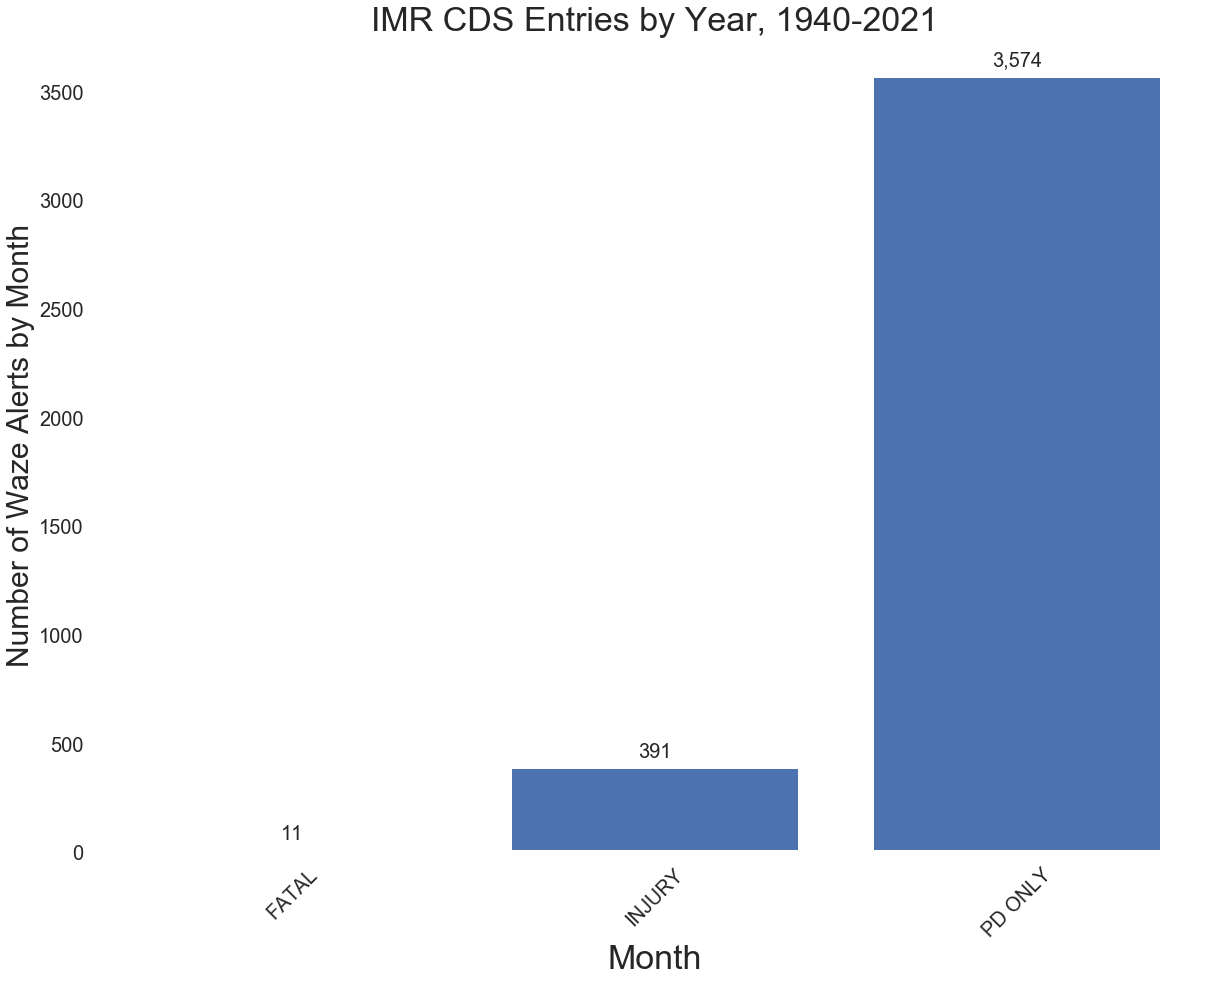

In [120]:
import matplotlib.ticker as ticker

tick_spacing = 1
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.bar(df_type_grouped.CATEGORY, df_type_grouped.number_of_crashes, linewidth=4)

#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
ax.set_title('IMR CDS Entries by Year, 1940-2021',fontsize= 34) # title of plot

ax.set_xlabel('Month',fontsize = 34) #xlabel
ax.set_ylabel('Number of Waze Alerts by Month', fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=20, rotation = 45)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=18)

for x,y in zip(df_type_grouped.CATEGORY, df_type_grouped.number_of_crashes):
    
    label = '{:,}'.format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 20) # horizontal alignment can be left, right or center
ax.grid('off')
plt.show()

In [122]:
df_imr_year.loc[df_imr_year['CATEGORY']=='FATAL']

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC,pub_utc_timestamp_date,date,month_year,year,month,hour
24445,24546,GLAC110723173300,110387,GLAC,IMR,1,MT,"Saturday, July 23, 2011",1733.0,10,...,GLAC-0010W,C3,20.559,1,2011-07-23,07/23/11,2011-07,2011,July,12AM
26426,26384,GRCA100923182500,105600,GRCA,IMR,1,AZ,"Thursday, September 23, 2010",1825.0,16,...,GRCA-0016,C3,0.188,1,2010-09-23,09/23/10,2010-09,2010,September,12AM
44742,44530,LAMR110515165000,11216,LAMR,IMR,1,TX,"Sunday, May 15, 2011",1650.0,105,...,NaN,NaN,NaN,0,2011-05-15,05/15/11,2011-05,2011,May,12AM
68916,69191,ROMO090428220000,1520090212,ROMO,IMR,1,CO,"Tuesday, April 28, 2009",2200.0,10,...,ROMO-0010,C3,41.648,1,2009-04-28,04/28/09,2009-04,2009,April,12AM
78994,78888,YELL100626150000,102106,YELL,IMR,1,WY,"Saturday, June 26, 2010",1500.0,12,...,YELL-0012,C3,5.858,1,2010-06-26,06/26/10,2010-06,2010,June,12AM
79002,78881,YELL100624144700,102121,YELL,IMR,1,WY,"Thursday, June 24, 2010",1447.0,17,...,YELL-0017,C3,2.389,1,2010-06-24,06/24/10,2010-06,2010,June,12AM
79569,78259,YELL080803134500,83676,YELL,IMR,1,WY,"Sunday, August 3, 2008",1345.0,10,...,YELL-0010,C3,84.938,1,2008-08-03,08/03/08,2008-08,2008,August,12AM


In [123]:
df_imr_year.shape

(4105, 64)

In [124]:
df_imr_year.PARK_ALPHA.value_counts()

YELL    1536
GRCA     741
GRTE     499
ROMO     384
GLAC     315
ZION     166
MEVE     107
GLCA     105
BIBE      62
PAIS      49
CHIC      46
COLM      43
SAGU      34
BRCA      11
BITH       2
PETR       1
PEFO       1
CORO       1
JODR       1
LAMR       1
Name: PARK_ALPHA, dtype: int64

In [126]:
for x in df_imr_year.PARK_ALPHA.value_counts():
    print(x/4)

384.0
185.25
124.75
96.0
78.75
41.5
26.75
26.25
15.5
12.25
11.5
10.75
8.5
2.75
0.5
0.25
0.25
0.25
0.25
0.25


In [129]:
df_imr_year.columns

Index(['OBJECTID', 'INCID_NO', 'CASE_NUM', 'PARK_ALPHA', 'Region', '# Crash',
       'STATE_CODE', 'CRASH_DATE', 'CRASH_TIME', 'RTE_NO', 'RTE_NAME',
       'NODE_DIST_FT', 'NODE_DIST_MI', 'NODE_DIR', 'NODE_NUM', 'LIGHT',
       'WEATHER', 'CRASH_LOCATION', 'SURF_COND', 'CRASH_CLASS', 'VEH_COLL',
       'OBJ_STRUCK', 'ROAD_CHAR', 'CON_FACT1', 'CON_FACT2', 'CON_FACT3',
       'CON_FACT4', 'CON_FACT5', 'CON_FACT6', 'HIT_RUN', 'CATEGORY', 'FATALS',
       'INJURED', 'PED_FAT', 'PED_INJ', 'BIKE_FAT', 'BIKE_INJ', 'PED',
       'CRASH_YEAR', 'COMMENTS', 'ZIPFILE', 'LOCATION', 'PHOTOS_TAKEN',
       'USPP_NPS_VEH_INV', 'PARK_PTY_DEST', 'LOCKED_UPDATE', 'LOCKED_BY_USER',
       'DATA_SRC', 'LATITUDE', 'LONGITUDE', 'MILEPOST', 'IMPORT_DATE',
       'FILE_NAME', 'SAVE_DATE', 'ROUTE_IDENT', 'RIP_CYCLE', 'MP_NODE',
       'SPTL_LOC', 'pub_utc_timestamp_date', 'date', 'month_year', 'year',
       'month', 'hour'],
      dtype='object')

In [130]:
df_type_grouped=df_imr_year.groupby(['CRASH_CLASS']).count()
df_type_grouped=df_type_grouped.reset_index()
df_type_grouped=df_type_grouped[['CRASH_CLASS','# Crash']].sort_values(by='CRASH_CLASS')
df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_type_grouped

,CRASH_CLASS,number_of_crashes
0,0.0,434
1,1.0,1235
2,2.0,835
3,3.0,29
4,4.0,7
5,5.0,290
6,6.0,1
7,7.0,548
8,10.0,1
9,88.0,211
